In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
(train_X, train_Y),(test_X, test_Y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_X.shape

(60000, 28, 28)

In [4]:
test_X.shape

(10000, 28, 28)

Text(0.5, 1.0, 'So:8')

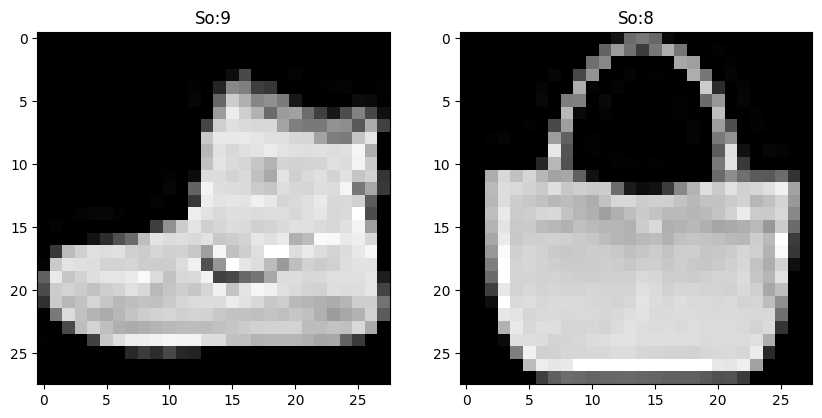

In [5]:
plt.figure(figsize = [10, 10])
plt.subplot(121)  # equivalent to: plt.subplot(1, 2, 1)
plt.imshow(train_X[0], cmap = 'gray')
plt.title('So:{}'.format(train_Y[0]))

plt.subplot(122)
plt.imshow(train_X[100], cmap = 'gray')
plt.title('So:{}'.format(train_Y[100]))

In [6]:
train_X = train_X.reshape(60000, 28, 28, 1)
test_X = test_X.reshape(10000, 28, 28, 1)
train_X.shape
test_X.shape

(10000, 28, 28, 1)

In [7]:
train_X = train_X.astype('float32') /255
test_X = test_X.astype('float32') /255

In [8]:
from keras.utils import to_categorical
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras import losses
batch_size = 64
epochs = 20
classes = 10
loss = losses

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape = (28, 28, 1), padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(64, (3, 3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

In [11]:
#bo ANN de phan loai
model.add(Flatten())    #chuyen anh thanh vecto, dua qua mang ANN
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax')) #classes = 10

In [12]:
from keras import optimizers
model.compile(loss = loss.categorical_crossentropy, optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [ ]:
train = model.fit(train_X, train_Y, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/20
938/938 [==============================] - 145s 153ms/step - loss: 0.4373 - accuracy: 0.8383
Epoch 2/20
938/938 [==============================] - 137s 146ms/step - loss: 0.2736 - accuracy: 0.9000
Epoch 3/20
938/938 [==============================] - 132s 140ms/step - loss: 0.2269 - accuracy: 0.9169
Epoch 4/20
938/938 [==============================] - 129s 137ms/step - loss: 0.1977 - accuracy: 0.9270
Epoch 5/20
938/938 [==============================] - 129s 137ms/step - loss: 0.1733 - accuracy: 0.9362
Epoch 6/20
938/938 [==============================] - 133s 142ms/step - loss: 0.1498 - accuracy: 0.9452
Epoch 7/20
938/938 [==============================] - 128s 136ms/step - loss: 0.1305 - accuracy: 0.9509
Epoch 8/20
794/938 [========================>.....] - ETA: 20s - loss: 0.1099 - accuracy: 0.9587

In [ ]:
model.save('/content/drive/MyDrive/AI/Backup_AI/fashion_mnist_cnn.h5')

In [ ]:
eval = model.evaluate(test_X, test_Y, verbose = 0)  #verbose = 0: khong hien thi train
print('Test loss: ', eval[0])
print('Test accuracy: ', eval[1])

In [ ]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')   # 'bo' la dau tron
plt.plot(epochs, loss, 'b', label = 'Test Accuracy')
plt.title('Training & Testing Accuracy')